In [3]:
psrname='J1713+0747'

In [4]:
spna_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNA/'+psrname+'/TM_WN_RN11_DM147_E1_idx4_E2_idx1/ptmcmc/'
spnta_dir='/media/root1/3PAR/sdandapat/posteriors/EPTA-ONLY/SPNTA/'+psrname+'/results/'

In [7]:
%matplotlib inline
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension
import pandas as pd

In [8]:
epta_spna_1=np.loadtxt(spna_dir+'chain_1.txt')
par_epta_spna=pd.read_csv(spna_dir+'pars.txt', header = None)
lspn=len(par_epta_spna)
epta_spna_2=epta_spna_1.T

In [9]:
epta_spnta_1=np.loadtxt(spnta_dir+'TNfinal-'+psrname+'-post_equal_weights.dat')
par_epta_spnta=pd.read_csv(spnta_dir+'TNfinal-'+psrname+'-.paramnames', header = None)
lspnt=len(par_epta_spnta)
epta_spnta_2=epta_spnta_1.T

In [10]:
spna_arr=[epta_spna_2[lspn-1],epta_spna_2[lspn-2],epta_spna_2[lspn-9],epta_spna_2[lspn-10]]

spnta_arr=[epta_spnta_2[lspnt-4],epta_spnta_2[lspnt-3],epta_spnta_2[lspnt-2],epta_spnta_2[lspnt-1]]

spna_arr_red=[epta_spna_2[lspn-1],epta_spna_2[lspn-2]]

spnta_arr_red=[epta_spnta_2[lspnt-4],epta_spnta_2[lspnt-3]]

spna_arr_dm=[epta_spna_2[lspn-9],epta_spna_2[lspn-10]]

spnta_arr_dm=[epta_spnta_2[lspnt-2],epta_spnta_2[lspnt-1]]

# Tension Considering red+dm

In [11]:
names = ['rn_logA','rn_gamma','dm_logA','dm_gamma']
labels=['\log A_R','\gamma_R', '\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

spna=MCSamples(samples=np.array(spna_arr).transpose(),loglikes=epta_spna_2[-3],names=names,labels=labels,label='SPNA')
spnta=MCSamples(samples=np.array(spnta_arr).transpose(),loglikes=epta_spnta_2[-1],names = names,labels=labels,label='SPNTA \n'+psrname)

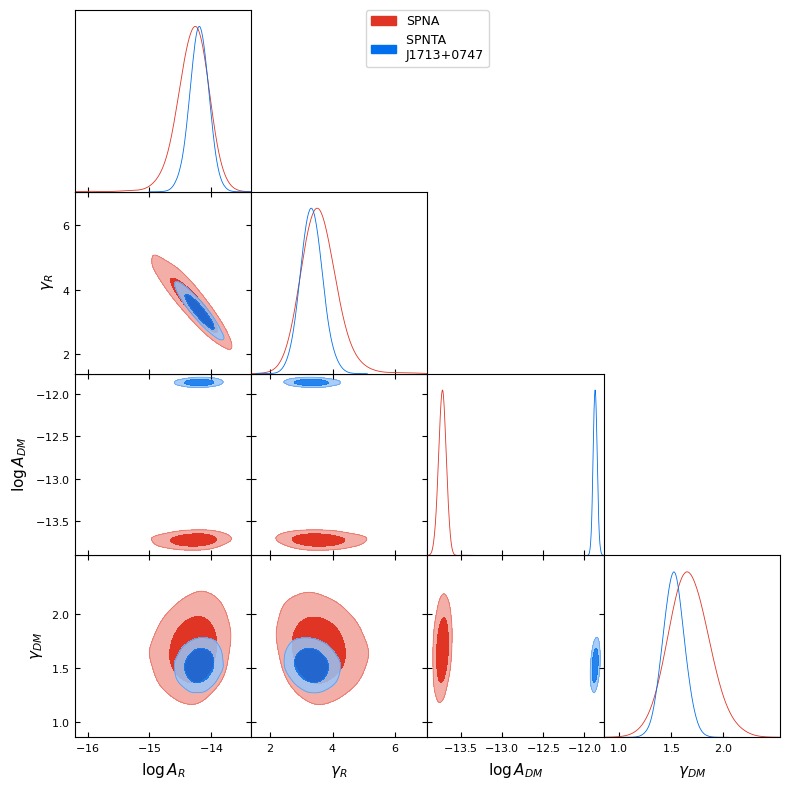

In [12]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna,spnta], filled=True)
plt.savefig(psrname+'_R_DM_EPTA_All.png',dpi=300)
plt.show()

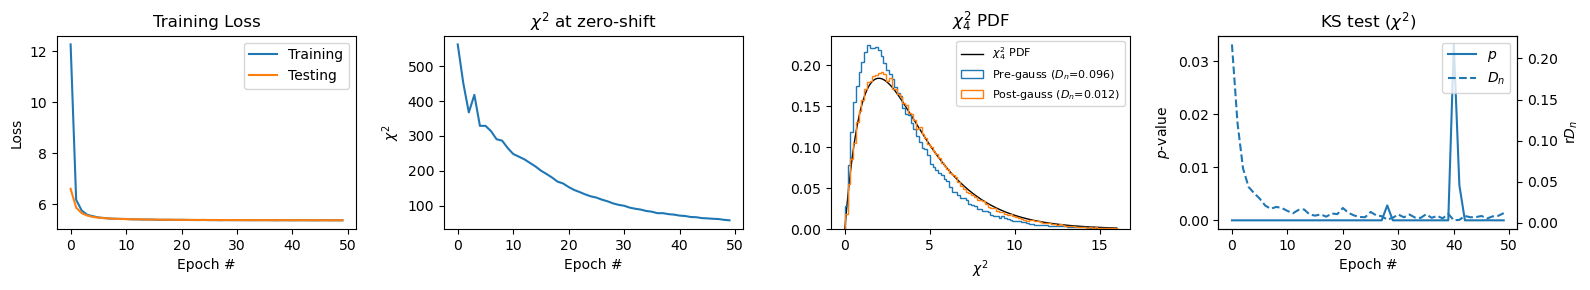

64/64 [==============================] - 5s 72ms/step - loss: 5.3645 - val_loss: 5.3675 - shift0_chi2: 57.5332 - shift0_pval: 1.0000 - shift0_nsigma: 6.8129 - chi2Z_ks: 0.0119 - chi2Z_ks_p: 4.1922e-25 - lr: 0.0100


/media/root1/3PAR/fazal/EPTA-ONLY/SPNTA/diff_chain.py:53: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


In [ ]:
%matplotlib inline
from diff_chain import  Diff_chain_shift
diff_chain, nsig, chi_2, D_B=Diff_chain_shift(spna,spnta)

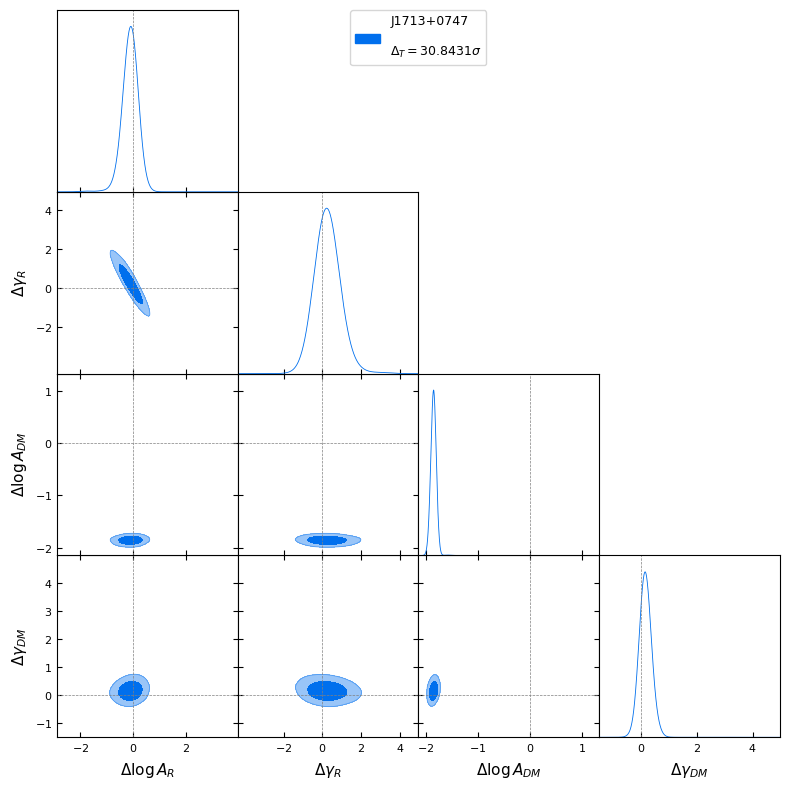

In [15]:
%matplotlib inline
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True)
plt.savefig(psrname+'_diff_EPTA_All.png',dpi=300)

# Tension considering red noise Only

In [28]:
names_r = ['rn_logA','rn_gamma']
labels_r=['\log A_R','\gamma_R']

spna_red=MCSamples(samples=np.array(spna_arr_red).transpose(),loglikes=epta_spna_2[-3],names=names_r,labels=labels_r,label='SPNA')
spnta_red=MCSamples(samples=np.array(spnta_arr_red).transpose(),loglikes=epta_spnta_2[-1],names = names_r,labels=labels_r,label='SPNTA \n'+psrname)

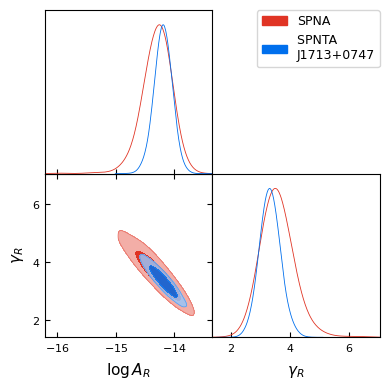

In [29]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_red,spnta_red], filled=True)
plt.savefig(psrname+'_R_EPTA_red.png',dpi=300)
plt.show()

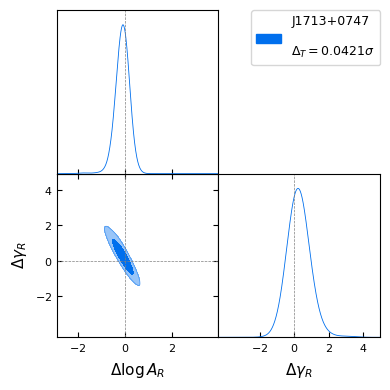

In [30]:
%matplotlib inline
diff_chain_dm, nsig_dm, chi_2_dm, D_B_dm=Diff_chain_shift(spna_red,spnta_red)
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_dm))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colodm_text=True)
plt.savefig(psrname+'_diff_EPTA_red.png',dpi=300)

# Tension considering dm noise only

In [31]:
spna_dm=MCSamples(samples=np.array(spna_arr_dm).transpose(),loglikes=epta_spna_2[-3],names=names_r,labels=labels_r,label='SPNA')
spnta_dm=MCSamples(samples=np.array(spnta_arr_dm).transpose(),loglikes=epta_spnta_2[-1],names = names_r,labels=labels_r,label='SPNTA \n'+psrname)

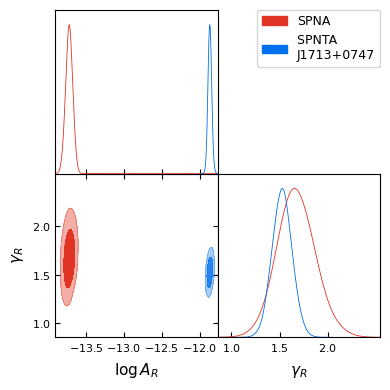

In [32]:
%matplotlib inline
g = plots.get_subplot_plotter()
g.triangle_plot([spna_dm,spnta_dm], filled=True)
plt.savefig(psrname+'_DM_EPTA_dm.png',dpi=300)
plt.show()

/media/root1/3PAR/fazal/EPTA-ONLY/SPNTA/diff_chain.py:30: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


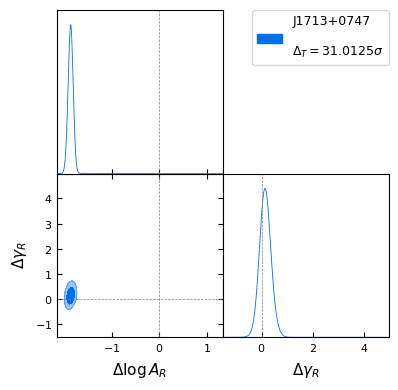

In [33]:
%matplotlib inline
diff_chain_dm, nsig_dm, chi_2_dm, D_B_dm=Diff_chain_shift(spna_dm,spnta_dm)
g = plots.get_subplot_plotter()
#nsig=utilities.from_confidence_to_sigma(shift_probability)
#getdist.plots.GetDistPlotSettings()
g.triangle_plot(diff_chain_dm, filled=True,legend_labels = [psrname+'\n\n$\Delta_T=$'+
                        str("{:.4f}".format(nsig_dm))+'$\sigma$'],markers=[0,0,0,0])
#g.add_label(['$\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colodm_text=True)
plt.savefig(psrname+'_diff_EPTA_dm.png',dpi=300)

In [34]:
def plot_diff_chain(A1,A2,lims=None,off_size=None):
    diff_chain, shift_probability, shift_lower, shift_upper=Diff_chain_shift(A1,A2,off_size)
    nsig=utilities.from_confidence_to_sigma(shift_probability)
    # plot the contour for a sanity check:
    g = plots.get_single_plotter()
    diff_chain.updateSettings({'contours': [shift_probability,0.68, 0.95]})
    g.settings.num_plot_contours = 3
    g.plot_2d(diff_chain,param1=del_names[0], param2=del_names[1], solid_colors='r',filled=True,lims=lims)
    g.add_legend([ A1.getLabel()+' & '+A2.getLabel()+ 
                  '\n\n $\Delta=$'+str("{:.2f}".format(nsig))+'$\sigma$'], colored_text=True);
    g.add_x_marker(0)
    g.add_y_marker(0)
    plt.savefig(psrname+'_'+A1.getLabel()+'_'+A2.getLabel()+'_R.png',dpi=300)
    
    return diff_chain,shift_probability

In [35]:
plot_diff_chain(spna_dm,spnta_dm)

/media/root1/3PAR/fazal/EPTA-ONLY/SPNTA/diff_chain.py:30: UserWarning: Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.
  warnings.warn('Tension is higher than 4 sigma!! chi squared estimators will be used to compute the tension.')


ValueError: ('Input probability has to be between zero and one.\n', 'Input value is ', 31.012543652979044)